## Co-Occurrence

Ex: words/sentences used in lecture Module 3 Lesson 2: Maximum Likelihood estimation of CAP 6307 NLP

In [1]:
import os
import sys
import pandas as pd

notebook_dir = os.getcwd()

sys.path.append(os.path.join(notebook_dir, '../'))
from data_processing import DataProcessing

In [2]:
s1 = "<s> I am Sam </s>"
s2 = "<s> Sam I am </s>"
s3 = "<s> I do not like green eggs and ham </s>"

In [3]:
def convert_str_to_list(s) -> list:
    s_as_list = s.split()

    return s_as_list

In [4]:
list_of_strings = []

s1_as_list = convert_str_to_list(s1)
s2_as_list = convert_str_to_list(s2)
s3_as_list = convert_str_to_list(s3)

list_of_strings.append(s1_as_list)
list_of_strings.append(s2_as_list)
list_of_strings.append(s3_as_list)

In [5]:
unique_words = {}
all_word_pairs = {}

for list_of_string in list_of_strings:
    sliding_window_start = 0
    sliding_window_end = 2
    sentence_word_pairs = []
    print(list_of_string)
    windows_needed = len(list_of_string) - 1
    # print(windows_needed)
    for i in range(windows_needed):
        words_in_window = list_of_string[sliding_window_start: sliding_window_end]
        print(f" {len(words_in_window)} {words_in_window}")
        sliding_window_start = sliding_window_start + 1
        sliding_window_end = sliding_window_end + 1
        sentence_word_pairs.append(words_in_window)
        # print(word_pairs)
    sentence = ' '.join(list_of_string)
    print(f" {sentence}")
    all_word_pairs[sentence] = sentence_word_pairs

all_word_pairs

['<s>', 'I', 'am', 'Sam', '</s>']
 2 ['<s>', 'I']
 2 ['I', 'am']
 2 ['am', 'Sam']
 2 ['Sam', '</s>']
 <s> I am Sam </s>
['<s>', 'Sam', 'I', 'am', '</s>']
 2 ['<s>', 'Sam']
 2 ['Sam', 'I']
 2 ['I', 'am']
 2 ['am', '</s>']
 <s> Sam I am </s>
['<s>', 'I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham', '</s>']
 2 ['<s>', 'I']
 2 ['I', 'do']
 2 ['do', 'not']
 2 ['not', 'like']
 2 ['like', 'green']
 2 ['green', 'eggs']
 2 ['eggs', 'and']
 2 ['and', 'ham']
 2 ['ham', '</s>']
 <s> I do not like green eggs and ham </s>


{'<s> I am Sam </s>': [['<s>', 'I'],
  ['I', 'am'],
  ['am', 'Sam'],
  ['Sam', '</s>']],
 '<s> Sam I am </s>': [['<s>', 'Sam'],
  ['Sam', 'I'],
  ['I', 'am'],
  ['am', '</s>']],
 '<s> I do not like green eggs and ham </s>': [['<s>', 'I'],
  ['I', 'do'],
  ['do', 'not'],
  ['not', 'like'],
  ['like', 'green'],
  ['green', 'eggs'],
  ['eggs', 'and'],
  ['and', 'ham'],
  ['ham', '</s>']]}

In [6]:
all_word_pairs.items

<function dict.items>

In [7]:
dfs = []
for sentence_idx, (sentence, word_pairs) in enumerate(all_word_pairs.items()):
    df = pd.DataFrame(word_pairs, columns=['start_word', 'end_word'])
    df['sentence_#'] = sentence_idx
    dfs.append(df)
dfs

[  start_word end_word  sentence_#
 0        <s>        I           0
 1          I       am           0
 2         am      Sam           0
 3        Sam     </s>           0,
   start_word end_word  sentence_#
 0        <s>      Sam           1
 1        Sam        I           1
 2          I       am           1
 3         am     </s>           1,
   start_word end_word  sentence_#
 0        <s>        I           2
 1          I       do           2
 2         do      not           2
 3        not     like           2
 4       like    green           2
 5      green     eggs           2
 6       eggs      and           2
 7        and      ham           2
 8        ham     </s>           2]

In [8]:
word_pairs_df = DataProcessing.concat_dfs(dfs)
word_pairs_df

,start_word,end_word,sentence_#
0,<s>,I,0
1,I,am,0
2,am,Sam,0
3,Sam,</s>,0
4,<s>,Sam,1
5,Sam,I,1
6,I,am,1
7,am,</s>,1
8,<s>,I,2
9,I,do,2


In [9]:
filt = (word_pairs_df['start_word'] == '<s>') & (word_pairs_df['end_word'] == 'I')
word_pairs_df[filt]

,start_word,end_word,sentence_#
0,<s>,I,0
8,<s>,I,2


In [10]:
def filt_by_pair(df, words):
    cols = df.columns.to_list()
    filt = (df[cols[0]] == words[0]) & (df[cols[1]] == words[1])
    return df[filt]

In [11]:
dfs_with_counts = []
filt_df_lengths = []
word_pairs = []
for idx, row in word_pairs_df.iterrows():
    start_word = row['start_word']
    end_word = row['end_word']
    words = [start_word, end_word]
    filt_df = filt_by_pair(word_pairs_df, words)
    filt_df['counts'] = len(filt_df)
    dfs_with_counts.append(len(filt_df))
    word_pairs.append(words)

dfs_with_counts

/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_6417/2185516851.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df['counts'] = len(filt_df)
/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_6417/2185516851.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df['counts'] = len(filt_df)
/var/folders/78/9z0b45fx1xqbwxh8vk97lcfh0000gn/T/ipykernel_6417/2185516851.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

[2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]

In [12]:
word_pairs_df['counts'] = dfs_with_counts
word_pairs_df['word_pairs'] = word_pairs
word_pairs_df

,start_word,end_word,sentence_#,counts,word_pairs
0,<s>,I,0,2,"[<s>, I]"
1,I,am,0,2,"[I, am]"
2,am,Sam,0,1,"[am, Sam]"
3,Sam,</s>,0,1,"[Sam, </s>]"
4,<s>,Sam,1,1,"[<s>, Sam]"
5,Sam,I,1,1,"[Sam, I]"
6,I,am,1,2,"[I, am]"
7,am,</s>,1,1,"[am, </s>]"
8,<s>,I,2,2,"[<s>, I]"
9,I,do,2,1,"[I, do]"


In [13]:
unique_start_words = list(word_pairs_df['start_word'].unique())
unique_end_words = list(word_pairs_df['end_word'].unique())
words = unique_start_words + unique_end_words
unique_words = pd.Series(words).unique()
unique_words

array(['<s>', 'I', 'am', 'Sam', 'do', 'not', 'like', 'green', 'eggs',
       'and', 'ham', '</s>'], dtype=object)

In [14]:
matrix = {}
for unique_word in unique_words:
    matrix[unique_word] = unique_words
matrix

{'<s>': array(['<s>', 'I', 'am', 'Sam', 'do', 'not', 'like', 'green', 'eggs',
        'and', 'ham', '</s>'], dtype=object),
 'I': array(['<s>', 'I', 'am', 'Sam', 'do', 'not', 'like', 'green', 'eggs',
        'and', 'ham', '</s>'], dtype=object),
 'am': array(['<s>', 'I', 'am', 'Sam', 'do', 'not', 'like', 'green', 'eggs',
        'and', 'ham', '</s>'], dtype=object),
 'Sam': array(['<s>', 'I', 'am', 'Sam', 'do', 'not', 'like', 'green', 'eggs',
        'and', 'ham', '</s>'], dtype=object),
 'do': array(['<s>', 'I', 'am', 'Sam', 'do', 'not', 'like', 'green', 'eggs',
        'and', 'ham', '</s>'], dtype=object),
 'not': array(['<s>', 'I', 'am', 'Sam', 'do', 'not', 'like', 'green', 'eggs',
        'and', 'ham', '</s>'], dtype=object),
 'like': array(['<s>', 'I', 'am', 'Sam', 'do', 'not', 'like', 'green', 'eggs',
        'and', 'ham', '</s>'], dtype=object),
 'green': array(['<s>', 'I', 'am', 'Sam', 'do', 'not', 'like', 'green', 'eggs',
        'and', 'ham', '</s>'], dtype=object),
 'eggs': 

In [15]:
rows, cols = len(matrix), len(matrix)
matrix_with_counts = [[0 for _ in range(cols)] for _ in range(rows)]

for word, words in matrix.items():
    for w in words:
        # print(word, w)
        words = [word, w]
        filt_df = filt_by_pair(word_pairs_df, words)
        if len(filt_df) > 0:
            # print(filt_df)
            pair_count = filt_df['counts']
            print(pair_count)


            for i in range(len(matrix_with_counts)):
                # print(i)
                for j in range(len(matrix_with_counts)):
                    # print(j)
                    matrix_with_counts[i][j] = pair_count
matrix_with_counts        

0    2
8    2
Name: counts, dtype: int64
4    1
Name: counts, dtype: int64
1    2
6    2
Name: counts, dtype: int64
9    1
Name: counts, dtype: int64
2    1
Name: counts, dtype: int64
7    1
Name: counts, dtype: int64
5    1
Name: counts, dtype: int64
3    1
Name: counts, dtype: int64
10    1
Name: counts, dtype: int64
11    1
Name: counts, dtype: int64
12    1
Name: counts, dtype: int64
13    1
Name: counts, dtype: int64
14    1
Name: counts, dtype: int64
15    1
Name: counts, dtype: int64
16    1
Name: counts, dtype: int64


[[16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64],
 [16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64],
 [16    1
  Name: counts, dtype: int64

In [16]:
matrix_with_counts

[[16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64],
 [16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64,
  16    1
  Name: counts, dtype: int64],
 [16    1
  Name: counts, dtype: int64

In [17]:
coocurrence_df = pd.DataFrame(index=unique_words, columns=unique_words)
coocurrence_df

,<s>,I,am,Sam,do,not,like,green,eggs,and,ham,</s>
<s>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
am,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
do,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
not,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
and,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
word_pairs_df

,start_word,end_word,sentence_#,counts,word_pairs
0,<s>,I,0,2,"[<s>, I]"
1,I,am,0,2,"[I, am]"
2,am,Sam,0,1,"[am, Sam]"
3,Sam,</s>,0,1,"[Sam, </s>]"
4,<s>,Sam,1,1,"[<s>, Sam]"
5,Sam,I,1,1,"[Sam, I]"
6,I,am,1,2,"[I, am]"
7,am,</s>,1,1,"[am, </s>]"
8,<s>,I,2,2,"[<s>, I]"
9,I,do,2,1,"[I, do]"


In [19]:
coocurrence_df.loc[unique_words[0], unique_words[0]]


nan

In [20]:
for row_word, _ in coocurrence_df.iterrows():
    # print(row_word)
    all_col_words = coocurrence_df.columns.to_list()
    # print(all_col_words)
    for col_word in all_col_words:
        print(f"{row_word} - {col_word}")
        for idx, row in word_pairs_df.iterrows():
            start_word = row['start_word']
            end_word = row['end_word']
            pair_counts = row['counts']
            coocurrence_df.loc[start_word, end_word] = pair_counts
            coocurrence_df

<s> - <s>
<s> - I
<s> - am
<s> - Sam
<s> - do
<s> - not
<s> - like
<s> - green
<s> - eggs
<s> - and
<s> - ham
<s> - </s>
I - <s>
I - I
I - am
I - Sam
I - do
I - not
I - like
I - green
I - eggs
I - and
I - ham
I - </s>
am - <s>
am - I
am - am
am - Sam
am - do
am - not
am - like
am - green
am - eggs
am - and
am - ham
am - </s>
Sam - <s>
Sam - I
Sam - am
Sam - Sam
Sam - do
Sam - not
Sam - like
Sam - green
Sam - eggs
Sam - and
Sam - ham
Sam - </s>
do - <s>
do - I
do - am
do - Sam
do - do
do - not
do - like
do - green
do - eggs
do - and
do - ham
do - </s>
not - <s>
not - I
not - am
not - Sam
not - do
not - not
not - like
not - green
not - eggs
not - and
not - ham
not - </s>
like - <s>
like - I
like - am
like - Sam
like - do
like - not
like - like
like - green
like - eggs
like - and
like - ham
like - </s>
green - <s>
green - I
green - am
green - Sam
green - do
green - not
green - like
green - green
green - eggs
green - and
green - ham
green - </s>
eggs - <s>
eggs - I
eggs - am
eggs - Sam
egg

In [21]:
coocurrence_df

,<s>,I,am,Sam,do,not,like,green,eggs,and,ham,</s>
<s>,NaN,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
I,NaN,NaN,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
am,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Sam,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
do,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
not,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
and,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [ ]:
coocurrence_df

[['<s>', 'I', 'am', 'Sam', '</s>'],
 ['<s>', 'Sam', 'I', 'am', '</s>'],
 ['<s>', 'I', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham', '</s>']]

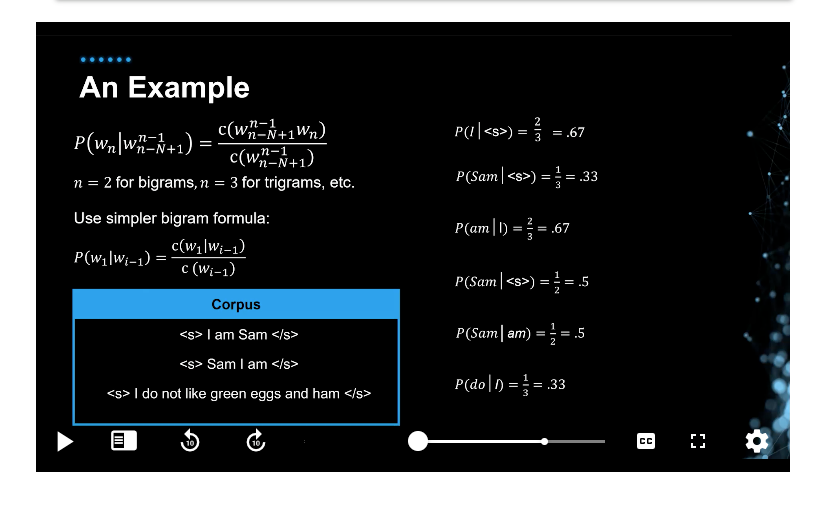